In [1]:
import os,sys
currentdir = os.getcwd()
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir)

In [2]:
import pennylane as qml
import torch
import numpy as np

In [3]:
qml.__version__

'0.8.0-dev'

In [4]:
import builtins
import time

In [5]:
#builtins.dev_qubit  = qml.device('qiskit.aer', wires=6,shots=200)
#builtins.dev_qubit  = qml.device('qiskit.aer', wires=6)
builtins.dev_qubit  = qml.device('default.qubit', wires=6)

In [6]:
from modules.QCircuitNet import QCircuitNet

In [7]:
model=QCircuitNet()

Parameter containing:
tensor([0.5774, 0.6317, 0.8345, 0.5516], requires_grad=True)


In [8]:
from utils.data_handling import simple_np_ds

In [9]:
dset=simple_np_ds("../data/moons.npz",val_split=0.2,test_split=0.2)

In [10]:
class CONFIG:
    pass
config=CONFIG()
config.batch_size_test = 1
config.batch_size_train = 2
config.batch_size_val = 1
config.num_val_samples=20
config.num_train_ensembles=8
config.lr=0.005
config.device = 'cpu'
config.num_workers_train=3
config.num_workers_val=2
config.num_workers_test=2
config.dump_path = '../model_state_dumps'

In [11]:
from modules.engine import Engine

In [12]:
engine=Engine(model,dset,config)

Sticking to CPU
Creating a directory for run dump: ../model_state_dumps/20191126_080702/


In [13]:
%%time
engine.train(epochs=20,report_interval=1,valid_interval=50)

Epoch 0 Starting @ 2019-11-26 08:07:02
... Iteration 0 ... Epoch 0.00 ... Validation Loss 1.408
Saved checkpoint as: ../model_state_dumps/20191126_080702/QCircuitNet.pth
best validation loss so far!: 1.407548962952569
Saved checkpoint as: ../model_state_dumps/20191126_080702/QCircuitNetBEST.pth
... Iteration 1 ... Epoch 0.01 ... Loss 3.062
... Iteration 2 ... Epoch 0.01 ... Loss 0.250
... Iteration 3 ... Epoch 0.01 ... Loss 3.062
... Iteration 4 ... Epoch 0.02 ... Loss 0.250
... Iteration 5 ... Epoch 0.03 ... Loss 3.062
... Iteration 6 ... Epoch 0.03 ... Loss 2.250
... Iteration 7 ... Epoch 0.04 ... Loss 0.450
... Iteration 8 ... Epoch 0.04 ... Loss 0.250
... Iteration 9 ... Epoch 0.04 ... Loss 2.250
... Iteration 10 ... Epoch 0.05 ... Loss 0.250
... Iteration 11 ... Epoch 0.05 ... Loss 0.108
... Iteration 12 ... Epoch 0.06 ... Loss 0.545
... Iteration 13 ... Epoch 0.06 ... Loss 3.062
... Iteration 14 ... Epoch 0.07 ... Loss 2.250
... Iteration 15 ... Epoch 0.07 ... Loss 0.209
... Iter

... Iteration 156 ... Epoch 0.78 ... Loss 3.062
... Iteration 157 ... Epoch 0.79 ... Loss 3.062
... Iteration 158 ... Epoch 0.79 ... Loss 0.379
... Iteration 159 ... Epoch 0.80 ... Loss 0.250
... Iteration 160 ... Epoch 0.80 ... Loss 0.397
... Iteration 161 ... Epoch 0.81 ... Loss 0.115
... Iteration 162 ... Epoch 0.81 ... Loss 0.250
... Iteration 163 ... Epoch 0.82 ... Loss 4.000
... Iteration 164 ... Epoch 0.82 ... Loss 2.250
... Iteration 165 ... Epoch 0.83 ... Loss 3.062
... Iteration 166 ... Epoch 0.83 ... Loss 0.250
... Iteration 167 ... Epoch 0.84 ... Loss 4.000
... Iteration 168 ... Epoch 0.84 ... Loss 2.250
... Iteration 169 ... Epoch 0.85 ... Loss 0.250
... Iteration 170 ... Epoch 0.85 ... Loss 3.062
... Iteration 171 ... Epoch 0.86 ... Loss 0.090
... Iteration 172 ... Epoch 0.86 ... Loss 2.250
... Iteration 173 ... Epoch 0.87 ... Loss 2.250
... Iteration 174 ... Epoch 0.87 ... Loss 0.168
... Iteration 175 ... Epoch 0.88 ... Loss 0.207
... Iteration 176 ... Epoch 0.88 ... Los

... Iteration 317 ... Epoch 1.58 ... Loss 2.250
... Iteration 318 ... Epoch 1.59 ... Loss 0.778
... Iteration 319 ... Epoch 1.59 ... Loss 0.256
... Iteration 320 ... Epoch 1.60 ... Loss 4.000
... Iteration 321 ... Epoch 1.60 ... Loss 2.250
... Iteration 322 ... Epoch 1.61 ... Loss 0.250
... Iteration 323 ... Epoch 1.61 ... Loss 3.062
... Iteration 324 ... Epoch 1.62 ... Loss 0.201
... Iteration 325 ... Epoch 1.62 ... Loss 3.062
... Iteration 326 ... Epoch 1.63 ... Loss 3.062
... Iteration 327 ... Epoch 1.63 ... Loss 3.062
... Iteration 328 ... Epoch 1.64 ... Loss 0.250
... Iteration 329 ... Epoch 1.64 ... Loss 0.122
... Iteration 330 ... Epoch 1.65 ... Loss 0.158
... Iteration 331 ... Epoch 1.65 ... Loss 0.148
... Iteration 332 ... Epoch 1.66 ... Loss 0.313
... Iteration 333 ... Epoch 1.66 ... Loss 0.250
... Iteration 334 ... Epoch 1.67 ... Loss 3.062
... Iteration 335 ... Epoch 1.67 ... Loss 2.250
... Iteration 336 ... Epoch 1.68 ... Loss 0.123
... Iteration 337 ... Epoch 1.68 ... Los

... Iteration 475 ... Epoch 2.37 ... Loss 0.250
... Iteration 476 ... Epoch 2.38 ... Loss 3.062
... Iteration 477 ... Epoch 2.38 ... Loss 0.069
... Iteration 478 ... Epoch 2.39 ... Loss 3.062
... Iteration 479 ... Epoch 2.39 ... Loss 0.250
... Iteration 480 ... Epoch 2.40 ... Loss 3.062
... Iteration 481 ... Epoch 2.40 ... Loss 3.062
... Iteration 482 ... Epoch 2.41 ... Loss 3.062
... Iteration 483 ... Epoch 2.41 ... Loss 0.250
... Iteration 484 ... Epoch 2.42 ... Loss 0.124
... Iteration 485 ... Epoch 2.42 ... Loss 2.250
... Iteration 486 ... Epoch 2.43 ... Loss 4.000
... Iteration 487 ... Epoch 2.43 ... Loss 3.062
... Iteration 488 ... Epoch 2.44 ... Loss 0.307
... Iteration 489 ... Epoch 2.44 ... Loss 4.000
... Iteration 490 ... Epoch 2.45 ... Loss 0.004
... Iteration 491 ... Epoch 2.45 ... Loss 2.250
... Iteration 492 ... Epoch 2.46 ... Loss 4.000
... Iteration 493 ... Epoch 2.46 ... Loss 3.062
... Iteration 494 ... Epoch 2.47 ... Loss 0.156
... Iteration 495 ... Epoch 2.47 ... Los

... Iteration 637 ... Epoch 3.18 ... Loss 0.160
... Iteration 638 ... Epoch 3.19 ... Loss 0.250
... Iteration 639 ... Epoch 3.19 ... Loss 4.000
... Iteration 640 ... Epoch 3.20 ... Loss 0.197
... Iteration 641 ... Epoch 3.20 ... Loss 3.062
... Iteration 642 ... Epoch 3.21 ... Loss 0.250
... Iteration 643 ... Epoch 3.21 ... Loss 0.099
... Iteration 644 ... Epoch 3.22 ... Loss 0.351
... Iteration 645 ... Epoch 3.22 ... Loss 0.488
... Iteration 646 ... Epoch 3.23 ... Loss 0.145
... Iteration 647 ... Epoch 3.23 ... Loss 0.152
... Iteration 648 ... Epoch 3.24 ... Loss 0.042
... Iteration 649 ... Epoch 3.24 ... Loss 0.250
... Iteration 650 ... Epoch 3.25 ... Loss 0.167
starting over on the training set
... Iteration 650 ... Epoch 3.25 ... Validation Loss 1.449
Saved checkpoint as: ../model_state_dumps/20191126_080702/QCircuitNet.pth
... Iteration 651 ... Epoch 3.25 ... Loss 4.000
... Iteration 652 ... Epoch 3.26 ... Loss 2.250
... Iteration 653 ... Epoch 3.26 ... Loss 0.010
... Iteration 654

... Iteration 798 ... Epoch 3.99 ... Loss 0.143
... Iteration 799 ... Epoch 3.99 ... Loss 4.000
... Iteration 800 ... Epoch 4.00 ... Loss 0.043
Epoch 4 Starting @ 2019-11-26 08:09:59
starting over on the training set
... Iteration 800 ... Epoch 4.00 ... Validation Loss 2.017
Saved checkpoint as: ../model_state_dumps/20191126_080702/QCircuitNet.pth
... Iteration 801 ... Epoch 4.00 ... Loss 3.062
... Iteration 802 ... Epoch 4.01 ... Loss 3.062
... Iteration 803 ... Epoch 4.01 ... Loss 4.000
... Iteration 804 ... Epoch 4.02 ... Loss 0.169
... Iteration 805 ... Epoch 4.02 ... Loss 2.250
... Iteration 806 ... Epoch 4.03 ... Loss 0.080
... Iteration 807 ... Epoch 4.03 ... Loss 2.250
... Iteration 808 ... Epoch 4.04 ... Loss 3.062
... Iteration 809 ... Epoch 4.04 ... Loss 2.250
... Iteration 810 ... Epoch 4.05 ... Loss 0.386
... Iteration 811 ... Epoch 4.05 ... Loss 0.044
... Iteration 812 ... Epoch 4.06 ... Loss 4.000
... Iteration 813 ... Epoch 4.06 ... Loss 3.062
... Iteration 814 ... Epoc

... Iteration 956 ... Epoch 4.78 ... Loss 0.166
... Iteration 957 ... Epoch 4.78 ... Loss 4.000
... Iteration 958 ... Epoch 4.79 ... Loss 0.211
... Iteration 959 ... Epoch 4.79 ... Loss 3.062
... Iteration 960 ... Epoch 4.80 ... Loss 3.062
... Iteration 961 ... Epoch 4.80 ... Loss 4.000
... Iteration 962 ... Epoch 4.81 ... Loss 4.000
... Iteration 963 ... Epoch 4.81 ... Loss 3.062
... Iteration 964 ... Epoch 4.82 ... Loss 4.000
... Iteration 965 ... Epoch 4.82 ... Loss 3.062
... Iteration 966 ... Epoch 4.83 ... Loss 0.250
... Iteration 967 ... Epoch 4.83 ... Loss 3.062
... Iteration 968 ... Epoch 4.84 ... Loss 0.025
... Iteration 969 ... Epoch 4.84 ... Loss 4.000
... Iteration 970 ... Epoch 4.85 ... Loss 3.062
... Iteration 971 ... Epoch 4.85 ... Loss 0.021
... Iteration 972 ... Epoch 4.86 ... Loss 2.250
... Iteration 973 ... Epoch 4.86 ... Loss 4.000
... Iteration 974 ... Epoch 4.87 ... Loss 3.062
... Iteration 975 ... Epoch 4.87 ... Loss 4.000
... Iteration 976 ... Epoch 4.88 ... Los

... Iteration 1113 ... Epoch 5.56 ... Loss 4.000
... Iteration 1114 ... Epoch 5.57 ... Loss 4.000
... Iteration 1115 ... Epoch 5.57 ... Loss 3.062
... Iteration 1116 ... Epoch 5.58 ... Loss 0.155
... Iteration 1117 ... Epoch 5.58 ... Loss 2.250
... Iteration 1118 ... Epoch 5.59 ... Loss 3.062
... Iteration 1119 ... Epoch 5.59 ... Loss 0.105
... Iteration 1120 ... Epoch 5.60 ... Loss 3.062
... Iteration 1121 ... Epoch 5.60 ... Loss 4.000
... Iteration 1122 ... Epoch 5.61 ... Loss 0.130
... Iteration 1123 ... Epoch 5.61 ... Loss 3.062
... Iteration 1124 ... Epoch 5.62 ... Loss 3.062
... Iteration 1125 ... Epoch 5.62 ... Loss 4.000
... Iteration 1126 ... Epoch 5.63 ... Loss 3.062
... Iteration 1127 ... Epoch 5.63 ... Loss 2.250
... Iteration 1128 ... Epoch 5.64 ... Loss 3.062
... Iteration 1129 ... Epoch 5.64 ... Loss 2.250
... Iteration 1130 ... Epoch 5.65 ... Loss 2.250
... Iteration 1131 ... Epoch 5.65 ... Loss 0.299
... Iteration 1132 ... Epoch 5.66 ... Loss 0.113
... Iteration 1133 .

... Iteration 1272 ... Epoch 6.36 ... Loss 2.250
... Iteration 1273 ... Epoch 6.36 ... Loss 3.062
... Iteration 1274 ... Epoch 6.37 ... Loss 0.105
... Iteration 1275 ... Epoch 6.37 ... Loss 4.000
... Iteration 1276 ... Epoch 6.38 ... Loss 0.200
... Iteration 1277 ... Epoch 6.38 ... Loss 0.012
... Iteration 1278 ... Epoch 6.39 ... Loss 0.120
... Iteration 1279 ... Epoch 6.39 ... Loss 4.000
... Iteration 1280 ... Epoch 6.40 ... Loss 0.045
... Iteration 1281 ... Epoch 6.40 ... Loss 3.062
... Iteration 1282 ... Epoch 6.41 ... Loss 3.062
... Iteration 1283 ... Epoch 6.41 ... Loss 0.255
... Iteration 1284 ... Epoch 6.42 ... Loss 0.121
... Iteration 1285 ... Epoch 6.42 ... Loss 2.250
... Iteration 1286 ... Epoch 6.43 ... Loss 3.062
... Iteration 1287 ... Epoch 6.43 ... Loss 4.000
... Iteration 1288 ... Epoch 6.44 ... Loss 0.281
... Iteration 1289 ... Epoch 6.44 ... Loss 2.250
... Iteration 1290 ... Epoch 6.45 ... Loss 3.062
... Iteration 1291 ... Epoch 6.45 ... Loss 3.062
... Iteration 1292 .

... Iteration 1430 ... Epoch 7.15 ... Loss 0.010
... Iteration 1431 ... Epoch 7.15 ... Loss 4.000
... Iteration 1432 ... Epoch 7.16 ... Loss 2.250
... Iteration 1433 ... Epoch 7.16 ... Loss 2.250
... Iteration 1434 ... Epoch 7.17 ... Loss 2.250
... Iteration 1435 ... Epoch 7.17 ... Loss 0.250
... Iteration 1436 ... Epoch 7.18 ... Loss 0.096
... Iteration 1437 ... Epoch 7.18 ... Loss 4.000
... Iteration 1438 ... Epoch 7.19 ... Loss 0.018
... Iteration 1439 ... Epoch 7.19 ... Loss 4.000
... Iteration 1440 ... Epoch 7.20 ... Loss 2.250
... Iteration 1441 ... Epoch 7.20 ... Loss 0.058
... Iteration 1442 ... Epoch 7.21 ... Loss 4.000
... Iteration 1443 ... Epoch 7.21 ... Loss 0.106
... Iteration 1444 ... Epoch 7.22 ... Loss 0.084
... Iteration 1445 ... Epoch 7.22 ... Loss 0.250
... Iteration 1446 ... Epoch 7.23 ... Loss 0.250
... Iteration 1447 ... Epoch 7.23 ... Loss 0.032
... Iteration 1448 ... Epoch 7.24 ... Loss 0.072
... Iteration 1449 ... Epoch 7.24 ... Loss 0.079
... Iteration 1450 .

... Iteration 1587 ... Epoch 7.93 ... Loss 0.190
... Iteration 1588 ... Epoch 7.94 ... Loss 4.000
... Iteration 1589 ... Epoch 7.94 ... Loss 2.250
... Iteration 1590 ... Epoch 7.95 ... Loss 0.250
... Iteration 1591 ... Epoch 7.95 ... Loss 0.095
... Iteration 1592 ... Epoch 7.96 ... Loss 2.250
... Iteration 1593 ... Epoch 7.96 ... Loss 0.387
... Iteration 1594 ... Epoch 7.97 ... Loss 0.130
... Iteration 1595 ... Epoch 7.97 ... Loss 0.250
... Iteration 1596 ... Epoch 7.98 ... Loss 0.051
... Iteration 1597 ... Epoch 7.98 ... Loss 0.250
... Iteration 1598 ... Epoch 7.99 ... Loss 3.062
... Iteration 1599 ... Epoch 7.99 ... Loss 2.250
... Iteration 1600 ... Epoch 8.00 ... Loss 3.062
Epoch 8 Starting @ 2019-11-26 08:12:48
... Iteration 1600 ... Epoch 8.00 ... Validation Loss 1.602
Saved checkpoint as: ../model_state_dumps/20191126_080702/QCircuitNet.pth
... Iteration 1601 ... Epoch 8.00 ... Loss 0.107
... Iteration 1602 ... Epoch 8.01 ... Loss 2.250
... Iteration 1603 ... Epoch 8.01 ... Loss 

... Iteration 1746 ... Epoch 8.73 ... Loss 3.062
... Iteration 1747 ... Epoch 8.73 ... Loss 4.000
... Iteration 1748 ... Epoch 8.74 ... Loss 3.062
... Iteration 1749 ... Epoch 8.74 ... Loss 2.250
... Iteration 1750 ... Epoch 8.75 ... Loss 3.062
starting over on the training set
... Iteration 1750 ... Epoch 8.75 ... Validation Loss 1.765
Saved checkpoint as: ../model_state_dumps/20191126_080702/QCircuitNet.pth
... Iteration 1751 ... Epoch 8.75 ... Loss 3.062
... Iteration 1752 ... Epoch 8.76 ... Loss 0.109
... Iteration 1753 ... Epoch 8.76 ... Loss 3.062
... Iteration 1754 ... Epoch 8.77 ... Loss 0.176
... Iteration 1755 ... Epoch 8.77 ... Loss 0.207
... Iteration 1756 ... Epoch 8.78 ... Loss 3.062
... Iteration 1757 ... Epoch 8.78 ... Loss 4.000
... Iteration 1758 ... Epoch 8.79 ... Loss 3.062
... Iteration 1759 ... Epoch 8.79 ... Loss 3.062
... Iteration 1760 ... Epoch 8.80 ... Loss 0.100
... Iteration 1761 ... Epoch 8.80 ... Loss 4.000
... Iteration 1762 ... Epoch 8.81 ... Loss 2.250

... Iteration 1901 ... Epoch 9.51 ... Loss 3.062
... Iteration 1902 ... Epoch 9.51 ... Loss 4.000
... Iteration 1903 ... Epoch 9.52 ... Loss 0.051
... Iteration 1904 ... Epoch 9.52 ... Loss 2.250
... Iteration 1905 ... Epoch 9.53 ... Loss 3.062
... Iteration 1906 ... Epoch 9.53 ... Loss 0.144
... Iteration 1907 ... Epoch 9.54 ... Loss 0.308
... Iteration 1908 ... Epoch 9.54 ... Loss 0.031
... Iteration 1909 ... Epoch 9.55 ... Loss 0.087
... Iteration 1910 ... Epoch 9.55 ... Loss 3.062
... Iteration 1911 ... Epoch 9.56 ... Loss 0.250
... Iteration 1912 ... Epoch 9.56 ... Loss 0.108
... Iteration 1913 ... Epoch 9.57 ... Loss 4.000
... Iteration 1914 ... Epoch 9.57 ... Loss 0.267
... Iteration 1915 ... Epoch 9.58 ... Loss 0.109
... Iteration 1916 ... Epoch 9.58 ... Loss 0.073
... Iteration 1917 ... Epoch 9.59 ... Loss 2.250
... Iteration 1918 ... Epoch 9.59 ... Loss 2.250
... Iteration 1919 ... Epoch 9.60 ... Loss 4.000
... Iteration 1920 ... Epoch 9.60 ... Loss 3.062
... Iteration 1921 .

... Iteration 2056 ... Epoch 10.28 ... Loss 0.250
... Iteration 2057 ... Epoch 10.29 ... Loss 4.000
... Iteration 2058 ... Epoch 10.29 ... Loss 2.250
... Iteration 2059 ... Epoch 10.30 ... Loss 2.250
... Iteration 2060 ... Epoch 10.30 ... Loss 0.250
... Iteration 2061 ... Epoch 10.31 ... Loss 3.062
... Iteration 2062 ... Epoch 10.31 ... Loss 0.125
... Iteration 2063 ... Epoch 10.32 ... Loss 3.062
... Iteration 2064 ... Epoch 10.32 ... Loss 2.250
... Iteration 2065 ... Epoch 10.33 ... Loss 3.062
... Iteration 2066 ... Epoch 10.33 ... Loss 0.163
... Iteration 2067 ... Epoch 10.34 ... Loss 3.062
... Iteration 2068 ... Epoch 10.34 ... Loss 0.265
... Iteration 2069 ... Epoch 10.35 ... Loss 0.339
... Iteration 2070 ... Epoch 10.35 ... Loss 0.120
... Iteration 2071 ... Epoch 10.36 ... Loss 0.027
... Iteration 2072 ... Epoch 10.36 ... Loss 0.080
... Iteration 2073 ... Epoch 10.37 ... Loss 0.148
... Iteration 2074 ... Epoch 10.37 ... Loss 3.062
... Iteration 2075 ... Epoch 10.38 ... Loss 0.250


... Iteration 2211 ... Epoch 11.06 ... Loss 2.250
... Iteration 2212 ... Epoch 11.06 ... Loss 0.180
... Iteration 2213 ... Epoch 11.07 ... Loss 2.250
... Iteration 2214 ... Epoch 11.07 ... Loss 0.237
... Iteration 2215 ... Epoch 11.08 ... Loss 0.164
... Iteration 2216 ... Epoch 11.08 ... Loss 0.492
... Iteration 2217 ... Epoch 11.09 ... Loss 3.062
... Iteration 2218 ... Epoch 11.09 ... Loss 4.000
... Iteration 2219 ... Epoch 11.10 ... Loss 2.250
... Iteration 2220 ... Epoch 11.10 ... Loss 0.042
... Iteration 2221 ... Epoch 11.11 ... Loss 0.140
... Iteration 2222 ... Epoch 11.11 ... Loss 0.250
... Iteration 2223 ... Epoch 11.12 ... Loss 2.250
... Iteration 2224 ... Epoch 11.12 ... Loss 0.146
... Iteration 2225 ... Epoch 11.13 ... Loss 0.106
... Iteration 2226 ... Epoch 11.13 ... Loss 3.062
... Iteration 2227 ... Epoch 11.14 ... Loss 0.250
... Iteration 2228 ... Epoch 11.14 ... Loss 4.000
... Iteration 2229 ... Epoch 11.15 ... Loss 3.062
... Iteration 2230 ... Epoch 11.15 ... Loss 4.000


... Iteration 2364 ... Epoch 11.82 ... Loss 0.368
... Iteration 2365 ... Epoch 11.83 ... Loss 0.250
... Iteration 2366 ... Epoch 11.83 ... Loss 3.062
... Iteration 2367 ... Epoch 11.84 ... Loss 0.250
... Iteration 2368 ... Epoch 11.84 ... Loss 0.043
... Iteration 2369 ... Epoch 11.85 ... Loss 0.027
... Iteration 2370 ... Epoch 11.85 ... Loss 2.250
... Iteration 2371 ... Epoch 11.86 ... Loss 0.302
... Iteration 2372 ... Epoch 11.86 ... Loss 0.087
... Iteration 2373 ... Epoch 11.87 ... Loss 0.084
... Iteration 2374 ... Epoch 11.87 ... Loss 4.000
... Iteration 2375 ... Epoch 11.88 ... Loss 0.162
... Iteration 2376 ... Epoch 11.88 ... Loss 4.000
... Iteration 2377 ... Epoch 11.89 ... Loss 2.250
... Iteration 2378 ... Epoch 11.89 ... Loss 4.000
... Iteration 2379 ... Epoch 11.90 ... Loss 0.250
... Iteration 2380 ... Epoch 11.90 ... Loss 3.062
... Iteration 2381 ... Epoch 11.91 ... Loss 3.062
... Iteration 2382 ... Epoch 11.91 ... Loss 0.320
... Iteration 2383 ... Epoch 11.92 ... Loss 3.062


... Iteration 2518 ... Epoch 12.59 ... Loss 0.103
... Iteration 2519 ... Epoch 12.60 ... Loss 2.250
... Iteration 2520 ... Epoch 12.60 ... Loss 0.469
... Iteration 2521 ... Epoch 12.61 ... Loss 2.250
... Iteration 2522 ... Epoch 12.61 ... Loss 0.111
... Iteration 2523 ... Epoch 12.62 ... Loss 3.062
... Iteration 2524 ... Epoch 12.62 ... Loss 0.250
... Iteration 2525 ... Epoch 12.63 ... Loss 0.139
... Iteration 2526 ... Epoch 12.63 ... Loss 0.002
... Iteration 2527 ... Epoch 12.64 ... Loss 0.081
... Iteration 2528 ... Epoch 12.64 ... Loss 0.068
... Iteration 2529 ... Epoch 12.65 ... Loss 2.250
... Iteration 2530 ... Epoch 12.65 ... Loss 3.062
... Iteration 2531 ... Epoch 12.66 ... Loss 3.062
... Iteration 2532 ... Epoch 12.66 ... Loss 4.000
... Iteration 2533 ... Epoch 12.67 ... Loss 0.039
... Iteration 2534 ... Epoch 12.67 ... Loss 0.250
... Iteration 2535 ... Epoch 12.68 ... Loss 4.000
... Iteration 2536 ... Epoch 12.68 ... Loss 0.034
... Iteration 2537 ... Epoch 12.69 ... Loss 3.062


... Iteration 2674 ... Epoch 13.37 ... Loss 3.062
... Iteration 2675 ... Epoch 13.38 ... Loss 2.250
... Iteration 2676 ... Epoch 13.38 ... Loss 2.250
... Iteration 2677 ... Epoch 13.39 ... Loss 3.062
... Iteration 2678 ... Epoch 13.39 ... Loss 3.062
... Iteration 2679 ... Epoch 13.40 ... Loss 0.002
... Iteration 2680 ... Epoch 13.40 ... Loss 2.250
... Iteration 2681 ... Epoch 13.41 ... Loss 0.136
... Iteration 2682 ... Epoch 13.41 ... Loss 0.218
... Iteration 2683 ... Epoch 13.42 ... Loss 3.062
... Iteration 2684 ... Epoch 13.42 ... Loss 0.087
... Iteration 2685 ... Epoch 13.43 ... Loss 0.250
... Iteration 2686 ... Epoch 13.43 ... Loss 3.062
... Iteration 2687 ... Epoch 13.44 ... Loss 0.033
... Iteration 2688 ... Epoch 13.44 ... Loss 0.102
... Iteration 2689 ... Epoch 13.45 ... Loss 3.062
... Iteration 2690 ... Epoch 13.45 ... Loss 0.250
... Iteration 2691 ... Epoch 13.46 ... Loss 4.000
... Iteration 2692 ... Epoch 13.46 ... Loss 3.062
... Iteration 2693 ... Epoch 13.47 ... Loss 0.250


... Iteration 2829 ... Epoch 14.15 ... Loss 0.274
... Iteration 2830 ... Epoch 14.15 ... Loss 0.159
... Iteration 2831 ... Epoch 14.16 ... Loss 0.078
... Iteration 2832 ... Epoch 14.16 ... Loss 3.062
... Iteration 2833 ... Epoch 14.17 ... Loss 0.250
... Iteration 2834 ... Epoch 14.17 ... Loss 0.179
... Iteration 2835 ... Epoch 14.18 ... Loss 2.250
... Iteration 2836 ... Epoch 14.18 ... Loss 2.250
... Iteration 2837 ... Epoch 14.19 ... Loss 2.250
... Iteration 2838 ... Epoch 14.19 ... Loss 2.250
... Iteration 2839 ... Epoch 14.20 ... Loss 2.250
... Iteration 2840 ... Epoch 14.20 ... Loss 4.000
... Iteration 2841 ... Epoch 14.21 ... Loss 0.138
... Iteration 2842 ... Epoch 14.21 ... Loss 4.000
... Iteration 2843 ... Epoch 14.22 ... Loss 2.250
... Iteration 2844 ... Epoch 14.22 ... Loss 0.070
... Iteration 2845 ... Epoch 14.23 ... Loss 3.062
... Iteration 2846 ... Epoch 14.23 ... Loss 3.062
... Iteration 2847 ... Epoch 14.24 ... Loss 0.271
... Iteration 2848 ... Epoch 14.24 ... Loss 4.000


... Iteration 2985 ... Epoch 14.93 ... Loss 3.062
... Iteration 2986 ... Epoch 14.93 ... Loss 0.250
... Iteration 2987 ... Epoch 14.94 ... Loss 0.543
... Iteration 2988 ... Epoch 14.94 ... Loss 0.244
... Iteration 2989 ... Epoch 14.95 ... Loss 0.250
... Iteration 2990 ... Epoch 14.95 ... Loss 3.062
... Iteration 2991 ... Epoch 14.96 ... Loss 0.089
... Iteration 2992 ... Epoch 14.96 ... Loss 4.000
... Iteration 2993 ... Epoch 14.97 ... Loss 0.079
... Iteration 2994 ... Epoch 14.97 ... Loss 4.000
... Iteration 2995 ... Epoch 14.98 ... Loss 4.000
... Iteration 2996 ... Epoch 14.98 ... Loss 0.201
... Iteration 2997 ... Epoch 14.99 ... Loss 0.054
... Iteration 2998 ... Epoch 14.99 ... Loss 0.191
... Iteration 2999 ... Epoch 15.00 ... Loss 0.190
... Iteration 3000 ... Epoch 15.00 ... Loss 0.168
Epoch 15 Starting @ 2019-11-26 08:17:48
starting over on the validation set
starting over on the training set
... Iteration 3000 ... Epoch 15.00 ... Validation Loss 2.216
Saved checkpoint as: ../model

... Iteration 3139 ... Epoch 15.70 ... Loss 0.066
... Iteration 3140 ... Epoch 15.70 ... Loss 0.085
... Iteration 3141 ... Epoch 15.71 ... Loss 3.062
... Iteration 3142 ... Epoch 15.71 ... Loss 0.120
... Iteration 3143 ... Epoch 15.72 ... Loss 0.157
... Iteration 3144 ... Epoch 15.72 ... Loss 0.229
... Iteration 3145 ... Epoch 15.73 ... Loss 0.120
... Iteration 3146 ... Epoch 15.73 ... Loss 0.001
... Iteration 3147 ... Epoch 15.74 ... Loss 4.000
... Iteration 3148 ... Epoch 15.74 ... Loss 2.250
... Iteration 3149 ... Epoch 15.75 ... Loss 3.062
... Iteration 3150 ... Epoch 15.75 ... Loss 2.250
starting over on the training set
... Iteration 3150 ... Epoch 15.75 ... Validation Loss 1.192
Saved checkpoint as: ../model_state_dumps/20191126_080702/QCircuitNet.pth
... Iteration 3151 ... Epoch 15.76 ... Loss 3.062
... Iteration 3152 ... Epoch 15.76 ... Loss 2.250
... Iteration 3153 ... Epoch 15.77 ... Loss 2.250
... Iteration 3154 ... Epoch 15.77 ... Loss 0.096
... Iteration 3155 ... Epoch 15

... Iteration 3293 ... Epoch 16.47 ... Loss 0.245
... Iteration 3294 ... Epoch 16.47 ... Loss 0.250
... Iteration 3295 ... Epoch 16.48 ... Loss 0.114
... Iteration 3296 ... Epoch 16.48 ... Loss 0.084
... Iteration 3297 ... Epoch 16.49 ... Loss 3.062
... Iteration 3298 ... Epoch 16.49 ... Loss 4.000
... Iteration 3299 ... Epoch 16.50 ... Loss 0.309
... Iteration 3300 ... Epoch 16.50 ... Loss 0.250
... Iteration 3300 ... Epoch 16.50 ... Validation Loss 1.427
Saved checkpoint as: ../model_state_dumps/20191126_080702/QCircuitNet.pth
... Iteration 3301 ... Epoch 16.51 ... Loss 0.017
... Iteration 3302 ... Epoch 16.51 ... Loss 0.050
... Iteration 3303 ... Epoch 16.52 ... Loss 2.250
... Iteration 3304 ... Epoch 16.52 ... Loss 2.250
... Iteration 3305 ... Epoch 16.53 ... Loss 2.250
... Iteration 3306 ... Epoch 16.53 ... Loss 3.062
... Iteration 3307 ... Epoch 16.54 ... Loss 0.345
... Iteration 3308 ... Epoch 16.54 ... Loss 0.072
... Iteration 3309 ... Epoch 16.55 ... Loss 2.250
... Iteration 3

... Iteration 3449 ... Epoch 17.25 ... Loss 4.000
... Iteration 3450 ... Epoch 17.25 ... Loss 3.062
starting over on the training set
... Iteration 3450 ... Epoch 17.25 ... Validation Loss 1.473
Saved checkpoint as: ../model_state_dumps/20191126_080702/QCircuitNet.pth
... Iteration 3451 ... Epoch 17.26 ... Loss 3.062
... Iteration 3452 ... Epoch 17.26 ... Loss 0.047
... Iteration 3453 ... Epoch 17.27 ... Loss 0.033
... Iteration 3454 ... Epoch 17.27 ... Loss 0.250
... Iteration 3455 ... Epoch 17.28 ... Loss 3.062
... Iteration 3456 ... Epoch 17.28 ... Loss 0.140
... Iteration 3457 ... Epoch 17.29 ... Loss 3.062
... Iteration 3458 ... Epoch 17.29 ... Loss 3.062
... Iteration 3459 ... Epoch 17.30 ... Loss 0.253
... Iteration 3460 ... Epoch 17.30 ... Loss 0.149
... Iteration 3461 ... Epoch 17.31 ... Loss 3.062
... Iteration 3462 ... Epoch 17.31 ... Loss 0.250
... Iteration 3463 ... Epoch 17.32 ... Loss 0.250
... Iteration 3464 ... Epoch 17.32 ... Loss 0.250
... Iteration 3465 ... Epoch 17

... Iteration 3601 ... Epoch 18.01 ... Loss 0.161
... Iteration 3602 ... Epoch 18.01 ... Loss 0.255
... Iteration 3603 ... Epoch 18.02 ... Loss 0.066
... Iteration 3604 ... Epoch 18.02 ... Loss 0.250
... Iteration 3605 ... Epoch 18.03 ... Loss 4.000
... Iteration 3606 ... Epoch 18.03 ... Loss 3.062
... Iteration 3607 ... Epoch 18.04 ... Loss 0.010
... Iteration 3608 ... Epoch 18.04 ... Loss 2.250
... Iteration 3609 ... Epoch 18.05 ... Loss 2.250
... Iteration 3610 ... Epoch 18.05 ... Loss 3.062
... Iteration 3611 ... Epoch 18.06 ... Loss 4.000
... Iteration 3612 ... Epoch 18.06 ... Loss 0.431
... Iteration 3613 ... Epoch 18.07 ... Loss 0.250
... Iteration 3614 ... Epoch 18.07 ... Loss 0.220
... Iteration 3615 ... Epoch 18.08 ... Loss 0.089
... Iteration 3616 ... Epoch 18.08 ... Loss 0.250
... Iteration 3617 ... Epoch 18.09 ... Loss 3.062
... Iteration 3618 ... Epoch 18.09 ... Loss 0.250
... Iteration 3619 ... Epoch 18.10 ... Loss 0.074
... Iteration 3620 ... Epoch 18.10 ... Loss 3.062


... Iteration 3757 ... Epoch 18.79 ... Loss 3.062
... Iteration 3758 ... Epoch 18.79 ... Loss 4.000
... Iteration 3759 ... Epoch 18.80 ... Loss 0.053
... Iteration 3760 ... Epoch 18.80 ... Loss 3.062
... Iteration 3761 ... Epoch 18.81 ... Loss 0.012
... Iteration 3762 ... Epoch 18.81 ... Loss 0.190
... Iteration 3763 ... Epoch 18.82 ... Loss 0.222
... Iteration 3764 ... Epoch 18.82 ... Loss 0.052
... Iteration 3765 ... Epoch 18.83 ... Loss 0.250
... Iteration 3766 ... Epoch 18.83 ... Loss 4.000
... Iteration 3767 ... Epoch 18.84 ... Loss 0.250
... Iteration 3768 ... Epoch 18.84 ... Loss 4.000
... Iteration 3769 ... Epoch 18.85 ... Loss 0.030
... Iteration 3770 ... Epoch 18.85 ... Loss 0.025
... Iteration 3771 ... Epoch 18.86 ... Loss 0.078
... Iteration 3772 ... Epoch 18.86 ... Loss 3.062
... Iteration 3773 ... Epoch 18.87 ... Loss 0.250
... Iteration 3774 ... Epoch 18.87 ... Loss 0.096
... Iteration 3775 ... Epoch 18.88 ... Loss 0.105
... Iteration 3776 ... Epoch 18.88 ... Loss 2.250


... Iteration 3911 ... Epoch 19.56 ... Loss 3.062
... Iteration 3912 ... Epoch 19.56 ... Loss 3.062
... Iteration 3913 ... Epoch 19.57 ... Loss 0.108
... Iteration 3914 ... Epoch 19.57 ... Loss 4.000
... Iteration 3915 ... Epoch 19.58 ... Loss 3.062
... Iteration 3916 ... Epoch 19.58 ... Loss 3.062
... Iteration 3917 ... Epoch 19.59 ... Loss 0.034
... Iteration 3918 ... Epoch 19.59 ... Loss 0.098
... Iteration 3919 ... Epoch 19.60 ... Loss 0.245
... Iteration 3920 ... Epoch 19.60 ... Loss 3.062
... Iteration 3921 ... Epoch 19.61 ... Loss 4.000
... Iteration 3922 ... Epoch 19.61 ... Loss 2.250
... Iteration 3923 ... Epoch 19.62 ... Loss 3.062
... Iteration 3924 ... Epoch 19.62 ... Loss 0.144
... Iteration 3925 ... Epoch 19.63 ... Loss 0.264
... Iteration 3926 ... Epoch 19.63 ... Loss 0.057
... Iteration 3927 ... Epoch 19.64 ... Loss 0.455
... Iteration 3928 ... Epoch 19.64 ... Loss 0.250
... Iteration 3929 ... Epoch 19.65 ... Loss 0.062
... Iteration 3930 ... Epoch 19.65 ... Loss 0.119


In [14]:
from modules.plot_utils import disp_learn_hist_smoothed

In [15]:
loc=engine.dirpath

In [16]:
loc

'../model_state_dumps/20191126_080702/'

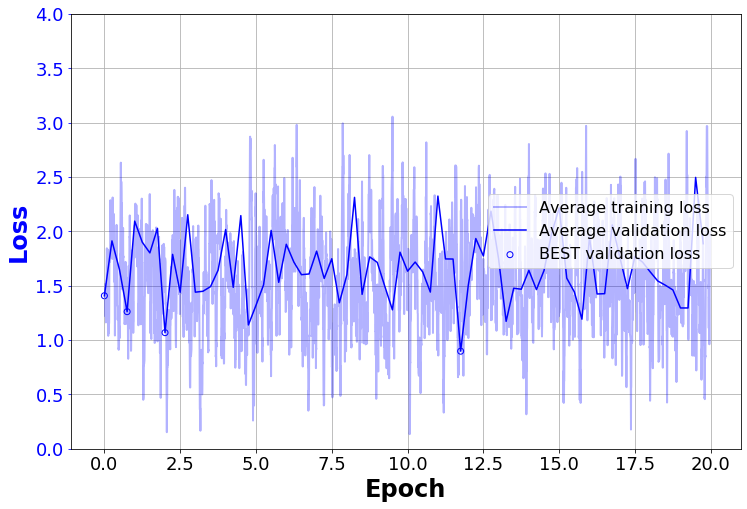

In [17]:
disp_learn_hist_smoothed(loc,window_val=1,window_train=10,losslim=4.0)